In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv", index_col="PassengerId")
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", index_col="PassengerId")
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.shape

(891, 11)

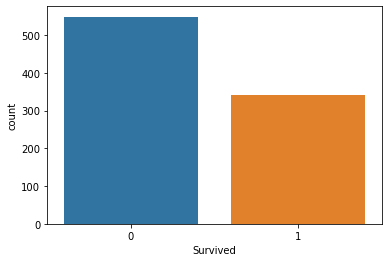

In [5]:
import seaborn as sns
ax = sns.countplot(x="Survived", data=train_data)

In [6]:
combined = pd.concat([train_data, test_data])
combined.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
combined.iloc[891:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [8]:
combined.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [9]:
combined[combined.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
combined.Embarked.mode()

0    S
dtype: object

In [11]:
combined["Embarked"].fillna("S", inplace=True)

In [12]:
combined[combined.Age.isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


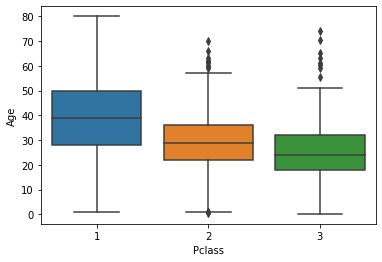

In [13]:
sns.boxplot(x = 'Pclass',y ='Age',data = combined)

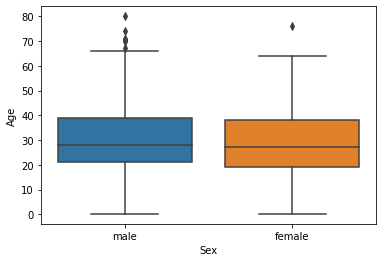

In [14]:
sns.boxplot(x='Sex', y='Age', data=combined )

In [15]:
pclass_1_mode_age = {"male":combined[(combined.Pclass == 1) & (combined.Sex=="male")]["Age"].mode().iloc[0],
                     "female" : combined[(combined.Pclass == 1) & (combined.Sex=="female")]["Age"].mode().iloc[0]}
pclass_2_mode_age = {"male":combined[(combined.Pclass == 2) & (combined.Sex=="male")]["Age"].mode().iloc[0],
                     "female" : combined[(combined.Pclass == 2) & (combined.Sex=="female")]["Age"].mode().iloc[0]}
pclass_3_mode_age = {"male":combined[(combined.Pclass == 3) & (combined.Sex=="male")]["Age"].mode().iloc[0],
                     "female" : combined[(combined.Pclass == 3) & (combined.Sex=="female")]["Age"].mode().iloc[0]}

pclass_1_mode_age, pclass_2_mode_age, pclass_3_mode_age

({'male': 36.0, 'female': 35.0},
 {'male': 30.0, 'female': 24.0},
 {'male': 21.0, 'female': 18.0})

In [16]:
def impute_age(row):
    age = row.Age
    pclass = row.Pclass
    if pd.isnull(age):
        if pclass == 1:
            return pclass_1_mode_age[row.Sex]
        elif pclass == 2:
            return pclass_2_mode_age[row.Sex]
        else:
            return pclass_3_mode_age[row.Sex]
    else:
        return age
combined["Age"] = combined.apply(impute_age, axis=1)

In [17]:
def process_age_type(row):
    age = row.Age
    if age < 18:
        return "child"
    elif age < 40:
        return "adult"
    elif age < 60:
        return "middle_aged"
    else:
        return "old"
combined["Age_type"] = combined.apply(process_age_type, axis=1)

In [18]:
combined.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
Age_type       0
dtype: int64

In [19]:
combined.loc[889]

Survived                                           0
Pclass                                             3
Name        Johnston, Miss. Catherine Helen "Carrie"
Sex                                           female
Age                                               18
SibSp                                              1
Parch                                              2
Ticket                                    W./C. 6607
Fare                                           23.45
Cabin                                            NaN
Embarked                                           S
Age_type                                       adult
Name: 889, dtype: object

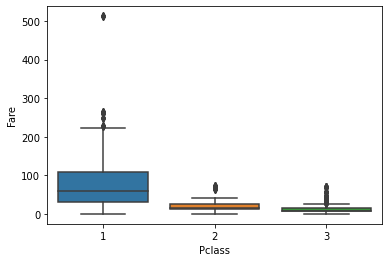

In [20]:
sns.boxplot(x= 'Pclass',y ='Fare',data = combined)

In [21]:
test_data[test_data.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [22]:
combined.Fare.fillna(combined[combined.Pclass == 3]["Fare"].mode()[0], inplace=True)

In [23]:
combined.Fare = combined.Fare.round()

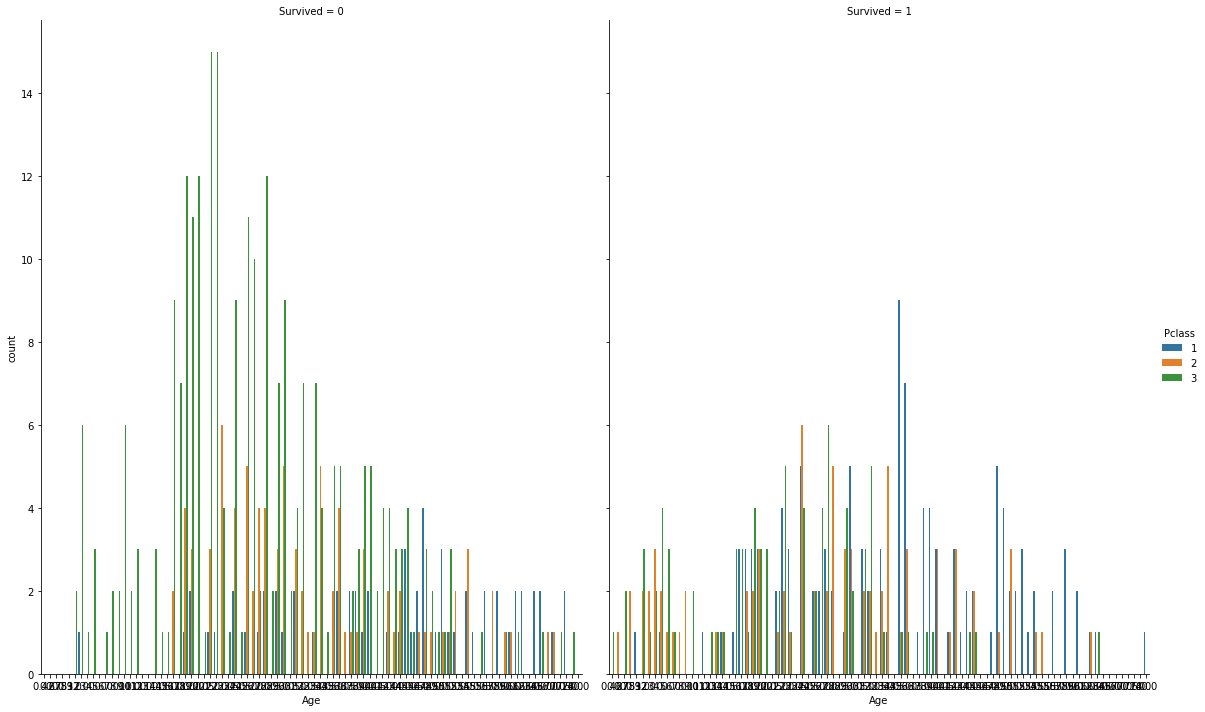

In [24]:
ax = sns.catplot(x="Age", col="Survived",hue="Pclass",
                data=train_data, kind="count",
                height=10, aspect=0.8, orient="h");

In [25]:
train_data[train_data.Survived==0]["Age"].mean() , train_data[train_data.Survived==1]["Age"].mean()

(30.62617924528302, 28.343689655172415)

In [26]:
train_data[(train_data.Survived==1) & (train_data.Sex == "male")]["Age"].mode()

0    32.0
dtype: float64

In [27]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
def process_deck(row):
    cabin = row.Cabin
    if pd.isnull(cabin):
        return "U"
    else:
        return cabin[0]
combined["Deck"] = combined.apply(process_deck, axis=1)
combined["Deck"].head()

PassengerId
1    U
2    C
3    U
4    C
5    U
Name: Deck, dtype: object

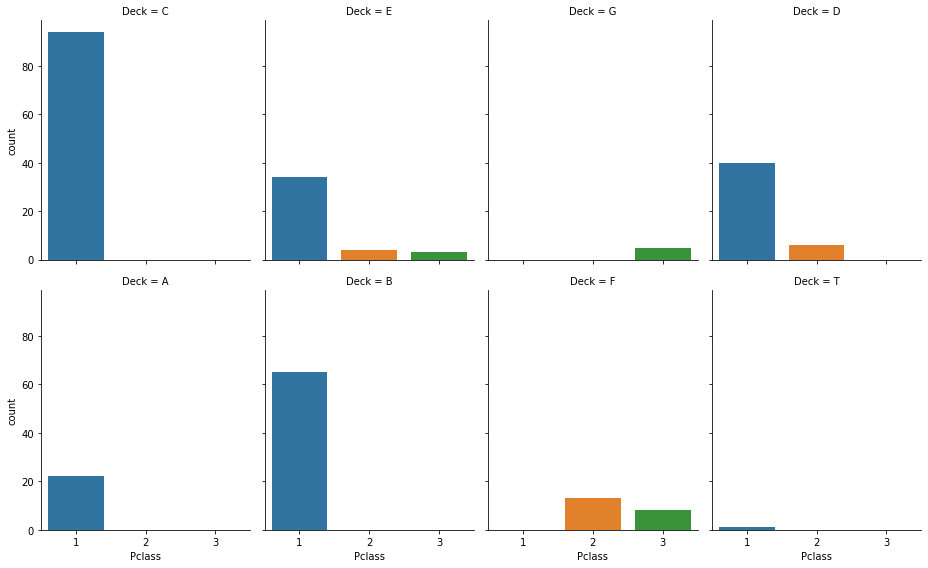

In [29]:
sns.catplot(x="Pclass", col="Deck", col_wrap=4,
                data=combined[combined.Deck != "U"],
                kind="count", height=4, aspect=.8)

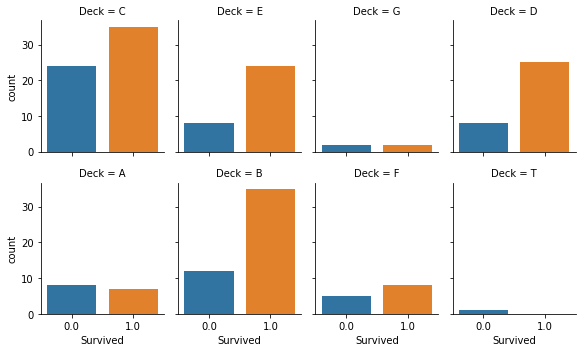

In [30]:
sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=combined[combined.Deck != "U"],
                kind="count", height=2.5, aspect=.8)

In [31]:
combined[combined.Fare == 0.0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_type,Deck
PassengerId,,,,,,,,,,,,,
180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,adult,U
264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,middle_aged,B
272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,adult,U
278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S,adult,U
303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,adult,U
414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S,adult,U
467,0.0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S,adult,U
482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,NaN,S,adult,U
598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,middle_aged,U


In [32]:
combined.groupby(["Pclass", "Deck"]).median()["Fare"]

Pclass  Deck
1       A       35.5
        B       82.0
        C       86.0
        D       53.0
        E       55.0
        T       36.0
        U       40.0
2       D       13.5
        E       11.0
        F       26.0
        U       16.0
3       E       12.0
        F        8.0
        G       17.0
        U        8.0
Name: Fare, dtype: float64

In [33]:
combined.groupby(["Pclass", "Deck"]).mean()["Fare"]

Pclass  Deck
1       A        41.363636
        B       122.353846
        C       107.989362
        D        58.900000
        E        63.382353
        T        36.000000
        U        70.358209
2       D        13.666667
        E        11.250000
        F        23.307692
        U        21.393701
3       E        10.666667
        F         9.500000
        G        14.200000
        U        13.365079
Name: Fare, dtype: float64

In [34]:
def process_unknown_decks(row):
    deck = row.Deck
    if deck == "U":
        fare = row.Fare
        if fare == 0:
            return "U"
        if row.Pclass == 1:
            if fare <= 43:
                return "A"
            elif fare <= 59:
                return "D"
            elif fare <= 63.5:
                return "E"
            elif fare <= 108:
                return "C"
            else:
                return "B"
        elif row.Pclass == 2:
            if fare <= 11.6:
                return  "E"
            elif fare <= 13.7:
                return "D"
            else:
                return "F"
        elif row.Pclass == 3:
            if fare <= 9.5:
                return "F"
            elif fare <= 12.5:
                return "E"
            else:
                return "G"
            
    else:
        return deck
combined["Deck"] = combined.apply(process_unknown_decks, axis=1)
combined["Deck"].head()

PassengerId
1    F
2    C
3    F
4    C
5    F
Name: Deck, dtype: object

In [35]:
pclass_deck_mode = {
    1:combined[(combined.Pclass==1) & (combined.Deck != 'U')]["Deck"].mode()[0],
    2:combined[(combined.Pclass==2) & (combined.Deck != 'U')]["Deck"].mode()[0],
    3:combined[(combined.Pclass==3) & (combined.Deck != 'U')]["Deck"].mode()[0],
}
pclass_deck_mode

{1: 'C', 2: 'F', 3: 'F'}

In [36]:
combined["Deck"].unique()

array(['F', 'C', 'E', 'G', 'D', 'A', 'B', 'U', 'T'], dtype=object)

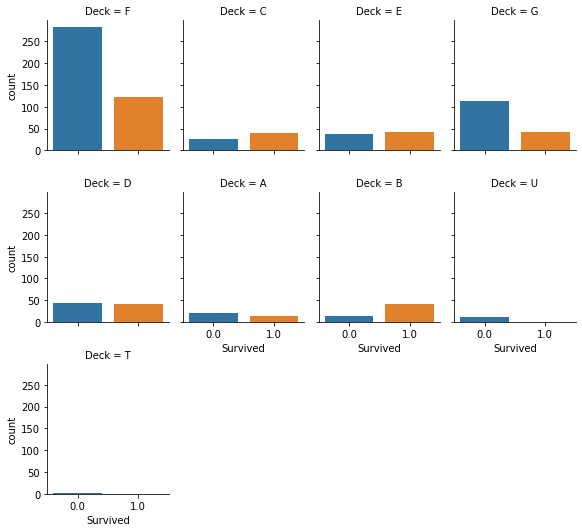

In [37]:
sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=combined,
                kind="count", height=2.5, aspect=.8)

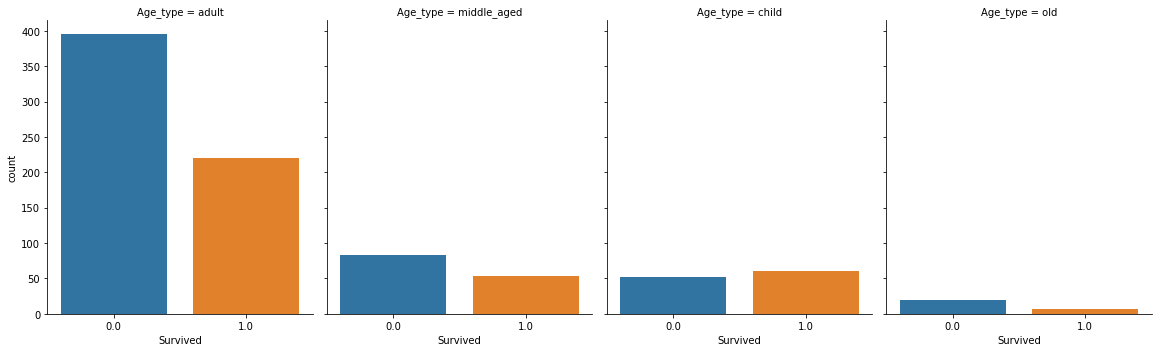

In [38]:
sns.catplot(x="Survived", col="Age_type", col_wrap=4,
            data=combined,
            kind="count",
            aspect=.8)

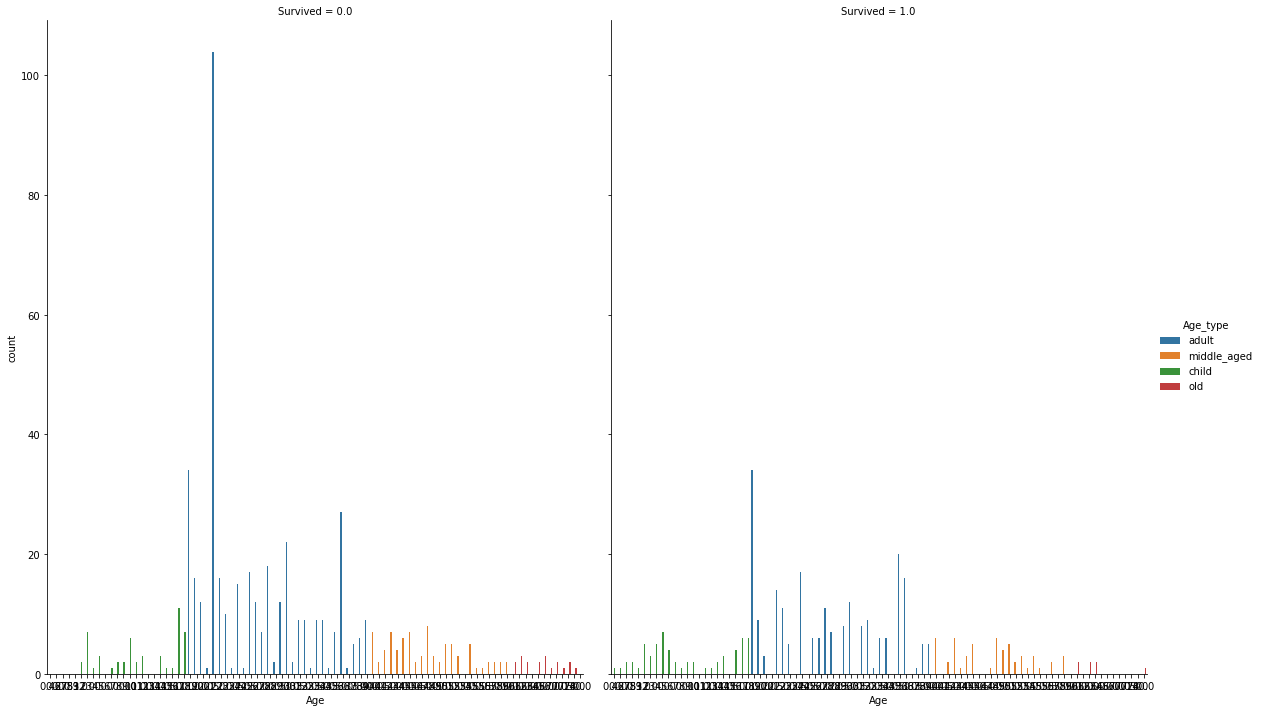

In [39]:
sns.catplot(x="Age", col="Survived",hue="Age_type",
                data=combined[:891], kind="count",
                height=10, aspect=0.8, orient="h");

In [40]:
# Process Name
def get_title(row):
    return row.Name.split(",")[1].strip().split(".")[0]
combined["Title"] = combined.apply(get_title, axis=1)
combined.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [41]:
title_mappings = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Royalty",
    "Lady" : "Royalty",
    "Dona": "Royalty"
}
combined["Title"] = combined["Title"].map(title_mappings)
combined["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Royalty', 'Officer'], dtype=object)

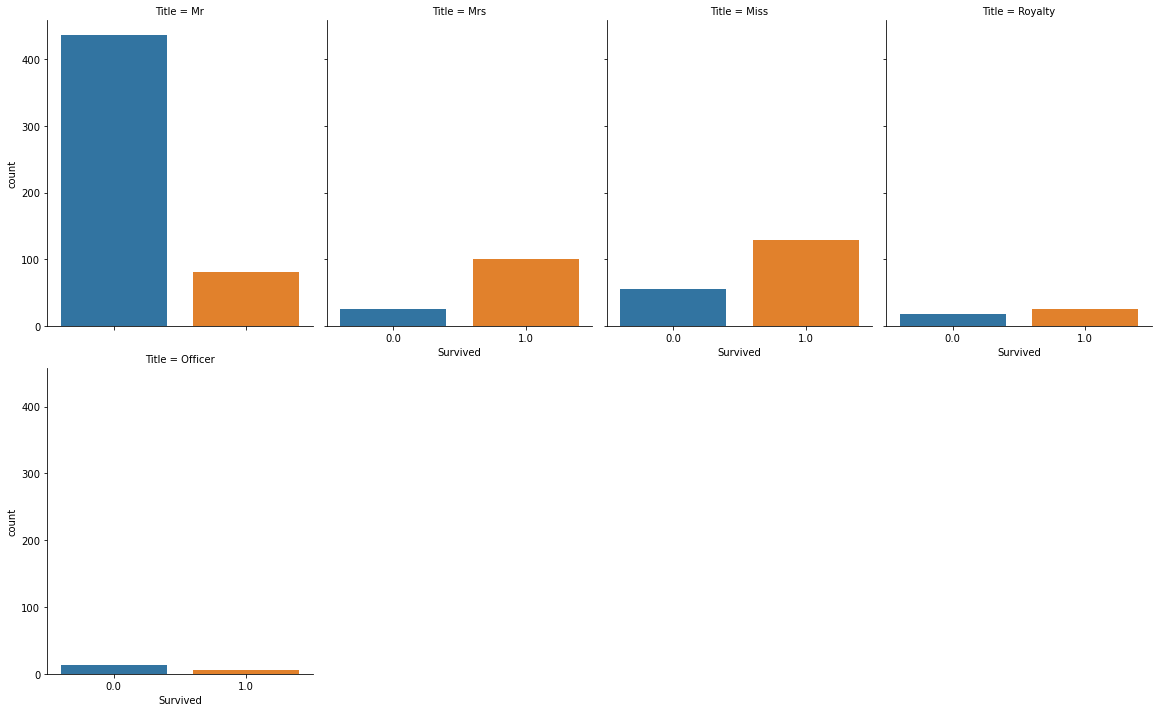

In [42]:
sns.catplot(x="Survived", col="Title", col_wrap=4,
            data=combined,
            kind="count",
            aspect=.8)

In [43]:
# Drop Cabin, Ticket, Name column
combined.drop(["Name", "Ticket","Cabin"], axis=1, inplace=True)

In [44]:
combined.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_type,Deck,Title
PassengerId,,,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.0,S,adult,F,Mr
2,1.0,1,female,38.0,1,0,71.0,C,adult,C,Mrs
3,1.0,3,female,26.0,0,0,8.0,S,adult,F,Miss
4,1.0,1,female,35.0,1,0,53.0,S,adult,C,Mrs
5,0.0,3,male,35.0,0,0,8.0,S,adult,F,Mr


In [45]:
combined.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [46]:
combined.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [47]:
#combined.Sex = combined.Sex.map({"male":0, "female":1})

In [48]:
combined["Family_size"] = combined["Parch"] + combined["SibSp"] + 1
combined["Family_size"].head()

PassengerId
1    2
2    2
3    1
4    2
5    1
Name: Family_size, dtype: int64

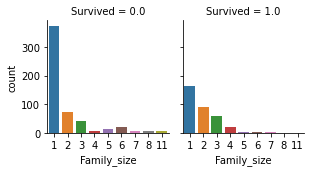

In [49]:
sns.catplot(x="Family_size", col="Survived", col_wrap=4,
                data=combined,
                kind="count", height=2.5, aspect=.8)

In [50]:
oh_features = ["Embarked", "Pclass", "Deck", "Sex", "Age_type", "Title"]
combined = pd.get_dummies(combined, columns=oh_features, prefix=oh_features)
combined.head()

,Survived,Age,SibSp,Parch,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Sex_male,Age_type_adult,Age_type_child,Age_type_middle_aged,Age_type_old,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,1,0,7.0,2,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
2,1.0,38.0,1,0,71.0,2,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1.0,26.0,0,0,8.0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,1.0,35.0,1,0,53.0,2,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
5,0.0,35.0,0,0,8.0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0


In [51]:
combined.dtypes

Survived                float64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Family_size               int64
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Deck_A                    uint8
Deck_B                    uint8
Deck_C                    uint8
Deck_D                    uint8
Deck_E                    uint8
Deck_F                    uint8
Deck_G                    uint8
Deck_T                    uint8
Deck_U                    uint8
Sex_female                uint8
Sex_male                  uint8
Age_type_adult            uint8
Age_type_child            uint8
Age_type_middle_aged      uint8
Age_type_old              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Officer             uint8
Title_Ro

In [52]:
combined.dtypes

Survived                float64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Family_size               int64
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Deck_A                    uint8
Deck_B                    uint8
Deck_C                    uint8
Deck_D                    uint8
Deck_E                    uint8
Deck_F                    uint8
Deck_G                    uint8
Deck_T                    uint8
Deck_U                    uint8
Sex_female                uint8
Sex_male                  uint8
Age_type_adult            uint8
Age_type_child            uint8
Age_type_middle_aged      uint8
Age_type_old              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Officer             uint8
Title_Ro

In [53]:
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


In [54]:
y = combined.iloc[:891].Survived
combined.drop(["Survived"], axis=1,inplace=True)
X = combined.iloc[:891]
test_data = combined.iloc[891:]

In [55]:
X.head()

,Age,SibSp,Parch,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Sex_male,Age_type_adult,Age_type_child,Age_type_middle_aged,Age_type_old,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.0,2,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
2,38.0,1,0,71.0,2,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,26.0,0,0,8.0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,35.0,1,0,53.0,2,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
5,35.0,0,0,8.0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [56]:
X.dtypes

Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Family_size               int64
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Deck_A                    uint8
Deck_B                    uint8
Deck_C                    uint8
Deck_D                    uint8
Deck_E                    uint8
Deck_F                    uint8
Deck_G                    uint8
Deck_T                    uint8
Deck_U                    uint8
Sex_female                uint8
Sex_male                  uint8
Age_type_adult            uint8
Age_type_child            uint8
Age_type_middle_aged      uint8
Age_type_old              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Officer             uint8
Title_Royalty             uint8
dtype: o

In [57]:
test_data.head()

,Age,SibSp,Parch,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,Sex_male,Age_type_adult,Age_type_child,Age_type_middle_aged,Age_type_old,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,8.0,1,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
893,47.0,1,0,7.0,2,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
894,62.0,0,0,10.0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
895,27.0,0,0,9.0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
896,22.0,1,1,12.0,3,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [58]:
y.head()

PassengerId
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

In [59]:
y = y.astype("uint8")

In [60]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: uint8

In [61]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
model = XGBClassifier(learning_rate=0.01,
                      n_estimators=1150,
                      max_depth=5,
                      objective= 'binary:logistic'
                     )
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
scores

array([0.81005587, 0.85393258, 0.76404494, 0.83707865, 0.85955056])

In [62]:
mean(scores)*100

82.49325214989642

In [63]:
model.fit(X,y)
predictions = model.predict(test_data)

In [64]:
predictions.dtype

dtype('uint8')

In [65]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
# output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictions})
# output.to_csv('my_submission12.csv', index=False)

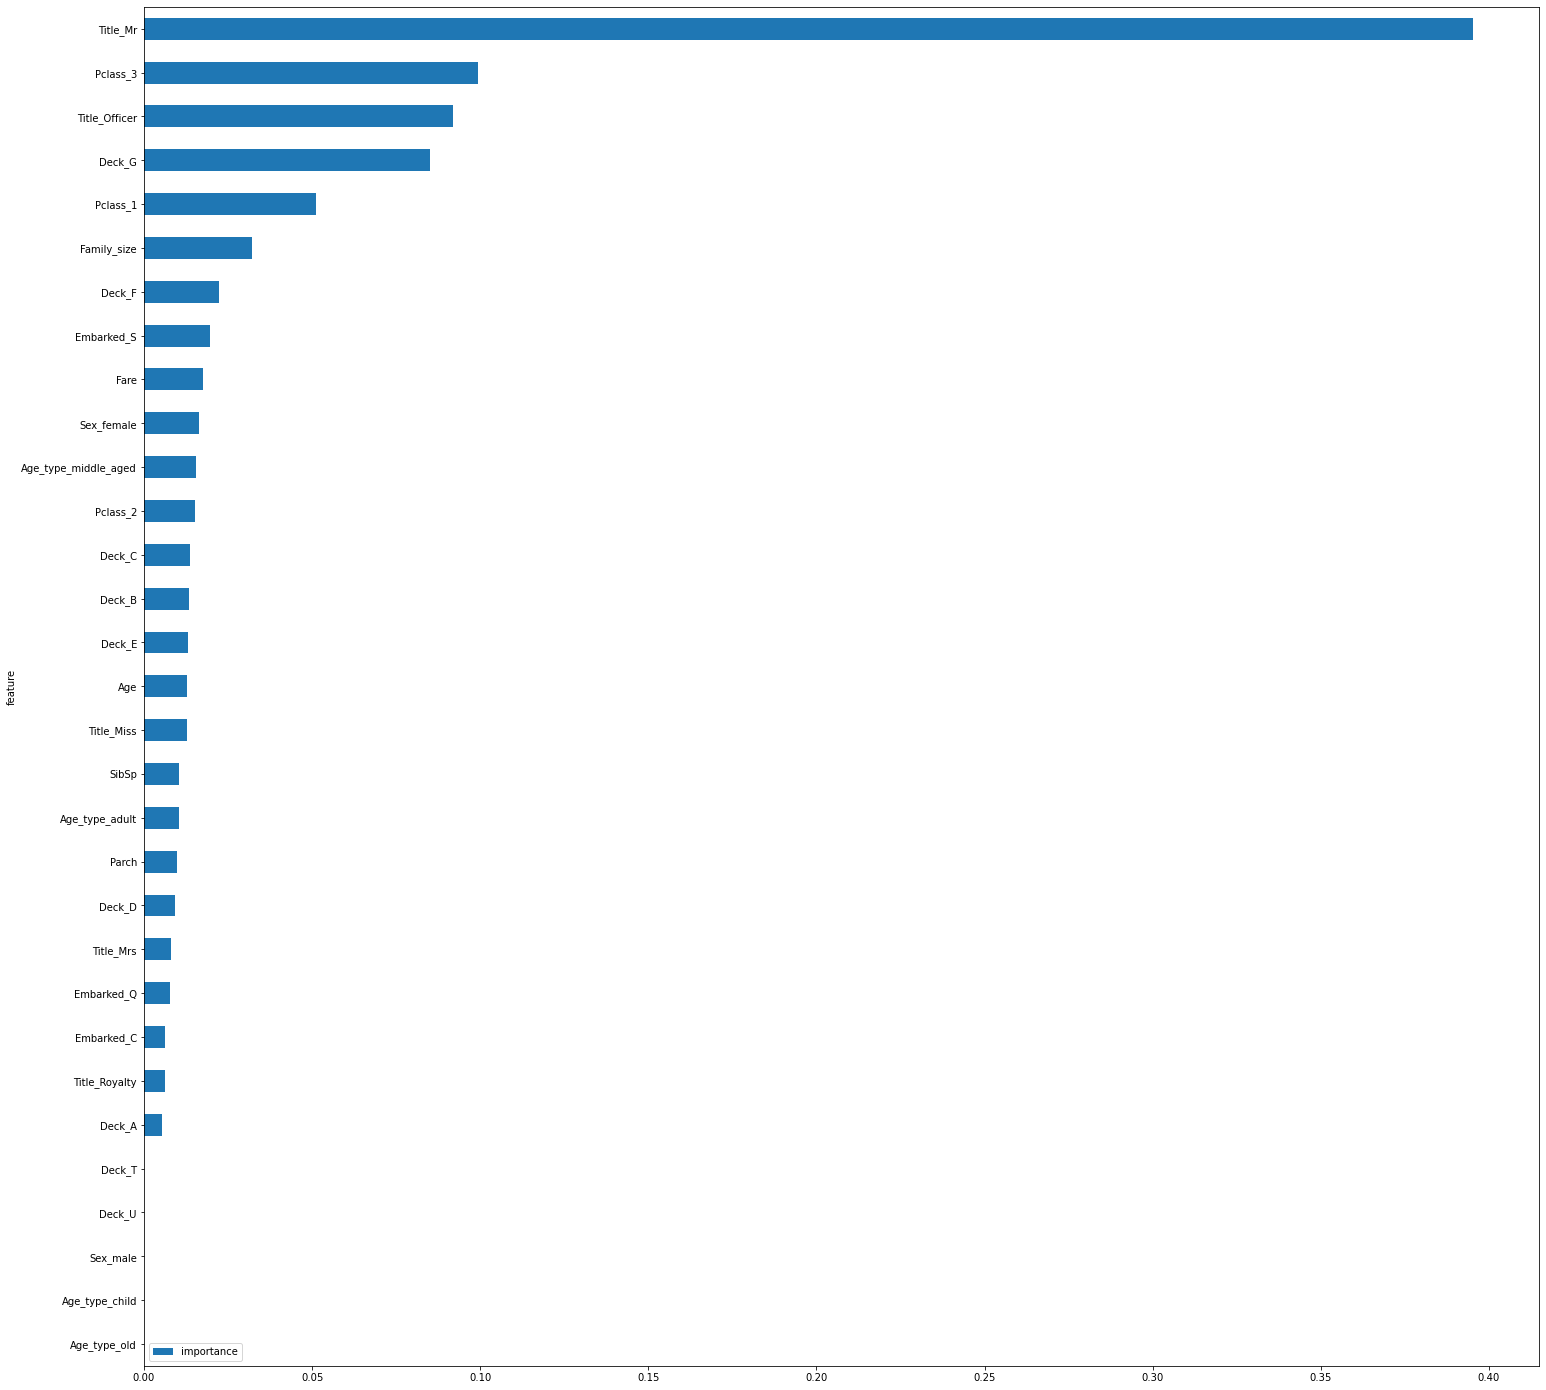

In [67]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

In [68]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [69]:
model = LGBMClassifier(learning_rate=0.01,
                       num_leaves = 30,
                       boosting_type='gbdt',
                       objective='binary',
                       metric='binary_logloss',
                       max_depth = 5,
                       n_estimators=1000, max_bin=255, subsample_for_bin=50000, 
                       min_split_gain=1, min_child_weight=2, min_child_samples=10, subsample=0.995)

In [70]:
model.fit(X, y)
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X)
roc_auc_score(y_pred,y)*100

88.7488034236162

In [71]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
features[features.importance != 0]

,importance
feature,
Fare,1272
Age,962
Family_size,293
Title_Mr,210
Sex_female,207
Pclass_3,169
Pclass_1,134
Embarked_S,118
Embarked_C,117


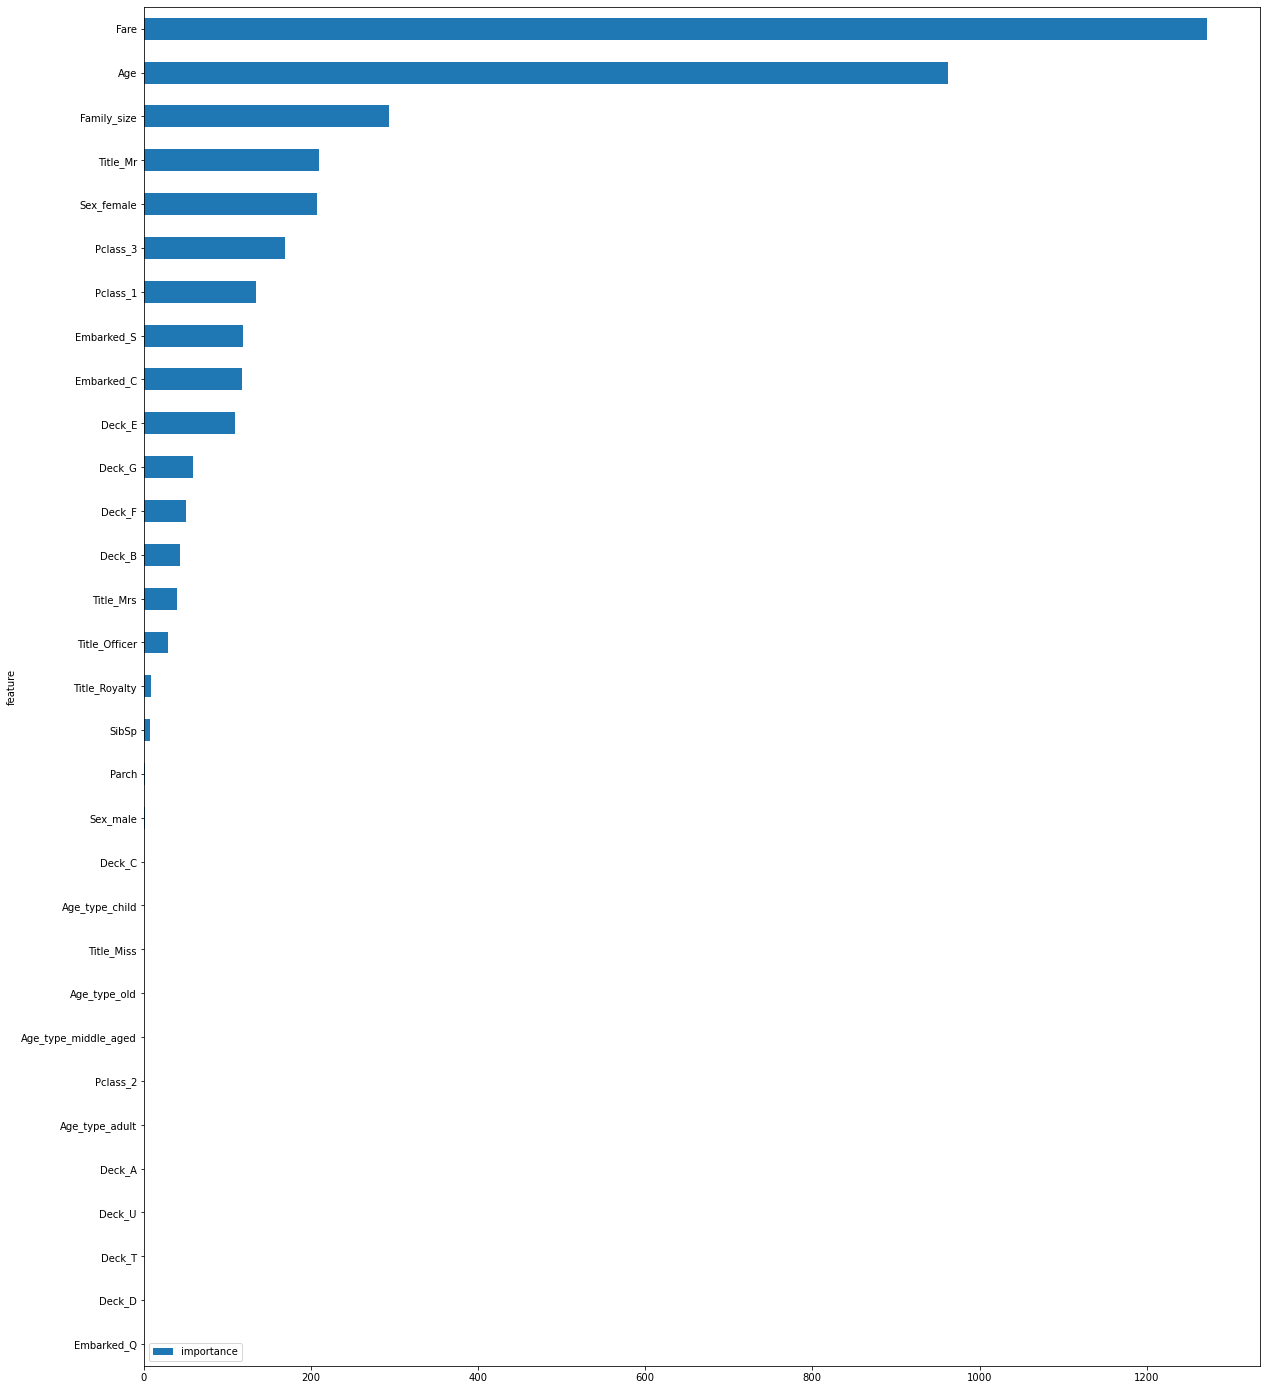

In [72]:
features.sort_values(by=['importance'], ascending=True, inplace=True)

features.plot(kind='barh', figsize=(20, 25))

In [73]:
predictions = model.predict(test_data)

In [74]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictions})
output.to_csv('my_submission20.csv', index=False)